In [60]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



#Load tables created from the data cleaning script as datadrames
mh_adolescent_trends = pd.read_csv('Output/mh_adolescent_trends.csv')
mh_language_trends = pd.read_csv('Output/mh_language_trends.csv')
suicide_rate_service = pd.read_csv('Output/suicide_rate_service.csv')
suicide_rate_payment = pd.read_csv('Output/suicide_rate_payment.csv')
mh_payassist_trends = pd.read_csv('Output/mh_payassist_trends.csv')
mh_lgbt_trends = pd.read_csv('Output/mh_lgbt_trends.csv')

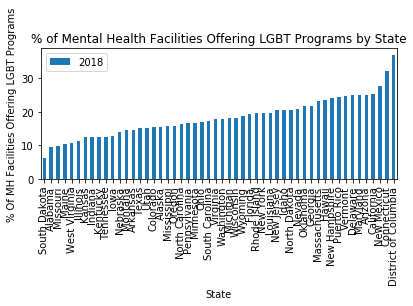

In [75]:

lang_plot = mh_lgbt_trends.sort_values('2018', ascending=True).plot(kind="bar", x = "state", y = "2018")
lang_plot.plot(figsize=(8, 6))
plt.title('% of Mental Health Facilities Offering LGBT Programs by State')
plt.xlabel('State')
plt.ylabel( '% Of MH Facilities Offering LGBT Programs')
plt.tight_layout()
plt.savefig("Images/lgbt_programs.png")
plt.show()

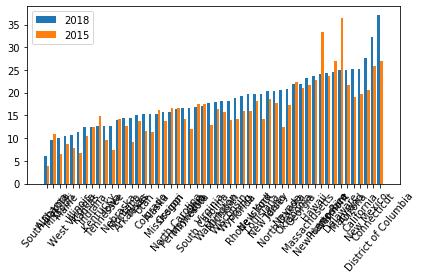

In [62]:
x = np.arange(len(mh_lgbt_trends))
tick_locations = [value+0.4 for value in x]

fig, ax = plt.subplots()
width  = .4
rects1 = ax.bar(x - width/2, mh_lgbt_trends.sort_values('2018', ascending=True)['2018'], width, label='2018')
rects2 = ax.bar(x + width/2, mh_lgbt_trends.sort_values('2018', ascending=True)['2017'], width, label='2015')

ax.set_xticks(x)
ax.set_xticklabels(mh_lgbt_trends.sort_values('2018', ascending=True)['state'], rotation=50)

ax.legend()
#ax.xticks(np.arange(12), mh_language_trends['2018'], rotation=20)
#ax.set(tick_locations, x, rotation="vertical")))

plt.tight_layout()
plt.show()
#ax.xticks(np.arange(12), mh_language_trends['2018'], rotation=20)
#ax.set(tick_locations, x, rotation="vertical")

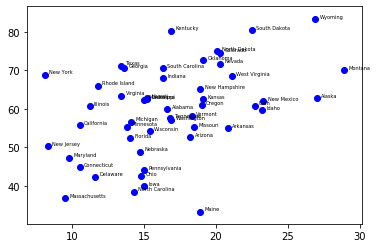

In [63]:
#suicide_rate_service_plot = suicide_rate_service.plot(kind="scatter", x = "RATE", y = "2017", s=26, edgecolors='black')

for i,type in enumerate(suicide_rate_service['state']):
    x = suicide_rate_service['RATE'][i]
    y = suicide_rate_service['2017'][i]
    plt.scatter(x, y, marker='o', color='blue')
    plt.text(x+0.3, y+0.3, type, fontsize=5, wrap=True)


plt.show()

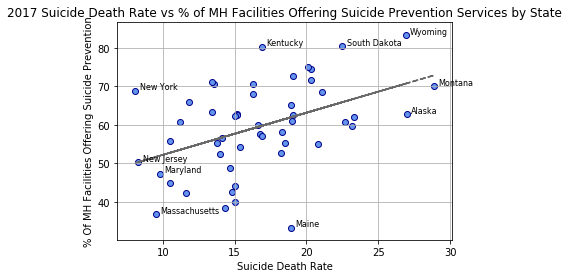

In [64]:
x_suicide = suicide_rate_service['RATE']
y_suicide = suicide_rate_service['2017']

for i,type in enumerate(suicide_rate_service['state']):
    x = x_suicide[i]
    y = y_suicide[i]
    plt.scatter(x, y, marker='o', color='cornflowerblue', edgecolors='darkblue')
    
    if (x < 10) or (x > 25) or (y < 38) or (y> 80):
        plt.text(x+0.3, y+0.3, type, fontsize=8, wrap=True)

z = np.polyfit(x_suicide, y_suicide, 1)
p = np.poly1d(z)
plt.plot(x_suicide,p(x_suicide),"r--", color = 'dimgray')

plt.xlabel('Suicide Death Rate')
plt.ylabel('% Of MH Facilities Offering Suicide Prevention')
plt.title("2017 Suicide Death Rate vs % of MH Facilities Offering Suicide Prevention Services by State", wrap=True)
plt.grid()
plt.savefig("Images/suicide_rate_service.png")

plt.show()

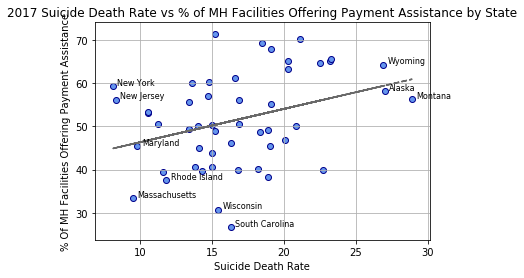

In [65]:
x_suicide_p = suicide_rate_payment['RATE']
y_suicide_p = suicide_rate_payment['2017']

for i,type in enumerate(suicide_rate_payment['state']):
    x = x_suicide_p[i]
    y = y_suicide_p[i]
    plt.scatter(x, y, marker='o', color='cornflowerblue', edgecolors='darkblue')
    
    if (x < 10) or (x > 25) or (y < 38):
        plt.text(x+0.3, y+0.3, type, fontsize=8, wrap=True)

z = np.polyfit(x_suicide_p, y_suicide_p, 1)
p = np.poly1d(z)
plt.plot(x_suicide_p,p(x_suicide_p),"r--", color = 'dimgray')

plt.xlabel('Suicide Death Rate')
plt.ylabel('% Of MH Facilities Offering Payment Assistance')
plt.title("2017 Suicide Death Rate vs % of MH Facilities Offering Payment Assistance by State", wrap=True)
plt.grid()
plt.savefig("Images/suicide_rate_payment.png")

plt.show()